# Dynamical Decoupling (DD) Simulation
## Special case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [3]:
import numpy as np
import scipy
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [4]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [6]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=100):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t)
    
print(epsilon)


    


[0j, (6.939948624420358e-11+2.040538469460256e-05j), (1.110300296317077e-09-8.161318341960689e-05j), (5.620126586526218e-09-0.0001835983334858753j), (1.7758975623570418e-08-0.00032631907503439644j), (4.3346204403984286e-08+0.0005097169679658668j), (8.985565369578393e-08+0.0007337169156326151j), (1.6640951339152478e-07+0.000998227195283381j), (2.8377083194380424e-07-0.0013031394952487659j), (4.5433467388365095e-07+0.001648328958852458j), (6.921179330768778e-07-0.0020336542350306614j), (1.0127478060620787e-06-0.0024589575356394463j), (1.4334489322754803e-06-0.002924064699427098j), (1.973029211788861e-06-0.0034287852626458323j), (2.651864306369312e-06+0.003972912536274603j), (3.4918808338175577e-06-0.004556223689822105j), (4.516538268607619e-06+0.005178479841676391j), (5.750809555560288e-06+0.005839426155964934j), (7.221160453375376e-06+0.006538791945886371j), (8.95552761692839e-06-0.0072762907834725155j), (1.0983295433144094e-05+0.008051620615736712j), (1.3335271625837877e-05-0.008864463

## Graph t vs $\epsilon$

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


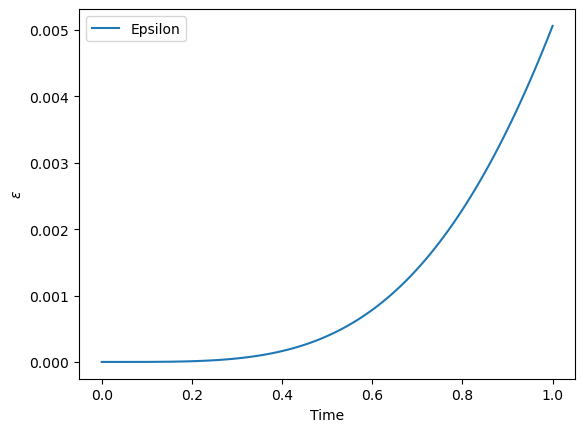

In [8]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previou case is:\
Ideal system: **$e^{-iZt_1}e^{-iZt_2}e^{-iZt_3}...e^{-iZt_m}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t_1}e^{-i(Z+\lambda{X})t_2}e^{-i(Z+\lambda{X})t_3}...e^{-i(Z+\lambda{X})t_m}$**
#### Want to simulate
**$\epsilon=||(e^{-i(Z+\lambda{X})t_1}Ze^{-i(Z+\lambda{X})t_2}Ze^{-i(Z+\lambda{X})t_3}Ze^{-i(Z+\lambda{X})t_4}Z...Ze^{-i(Z+\lambda{X})t_m}Z) - e^{-iZ(t_1+t_2+t_3+...+t_m)}||$**
### Simulation

In [10]:
def error_calculation(lambda_value, m, areEqual):
    sum_t = 0
    prev_A = I
    
    # Case when t1 = t2 = ... = tm
    if (areEqual==True):
        t = 1.0
        
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0):
                A = prev_A * expm(-1j*(Z-lambda_value*X)*t)
            # odd numbers
            else:
                A = prev_A * expm(-1j*(Z+lambda_value*X)*t)
            prev_A = A
        B = expm(-1j*Z*(m*t))
    
    # Case when all t have a different value        
    else:
        # simulating the equation 
        for t in np.linspace(1,m,num=m):
            # even numbers
            if (t%2 == 0):
                A = prev_A * expm(-1j*(Z-lambda_value*X)*t)
            # odd numbers
            else:
                A = prev_A * expm(-1j*(Z+lambda_value*X)*t)
            # updating variables
            sum_t += t
            prev_A = A 
        B = expm(-1j*Z*(sum_t))   
   
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

In [11]:
# creating the variables
time = []
epsilon = []

# set the value of lambda 
lambda_value = 0.1

print("For m = 2 and t1=t2=1 the error is " + str(error_calculation(lambda_value, 2, True))  ) 

print("##########################")
for m in range(1,51,1):
    epsilon.append(error_calculation(lambda_value, m, False))
    time.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, False)))

For m = 2 and t1=t2=1 the error is (0.005061354233638252+0.1413757617241366j)
##########################
For m = 1 the error is (-0.004203591607715107+0.084010074643974j)
For m = 2 the error is (0.013128985301228413+0.1737378196047283j)
For m = 3 the error is (-0.0058645533152879015-0.17370111392774257j)
For m = 4 the error is (0.03780896002285292+0.12544592991202852j)
For m = 5 the error is (-0.050048556554758455+0.15886072164509923j)
For m = 6 the error is (-0.09713665271635624-0.1417767151677401j)
For m = 7 the error is (-0.0296816385049703-0.16465079410797143j)
For m = 8 the error is (0.20400844987642117+0.07581402911371715j)
For m = 9 the error is (-0.23136061476812253-0.1254192675958783j)
For m = 10 the error is (0.2985361341597547-0.10604688337912099j)
For m = 11 the error is (0.09044360624573619-0.39284248989736986j)
For m = 12 the error is (-0.11389657090270999-0.4600648771836632j)
For m = 13 the error is (0.09930600825778924+0.5381422937166047j)
For m = 14 the error is (0.538

## Graph t vs $\epsilon$

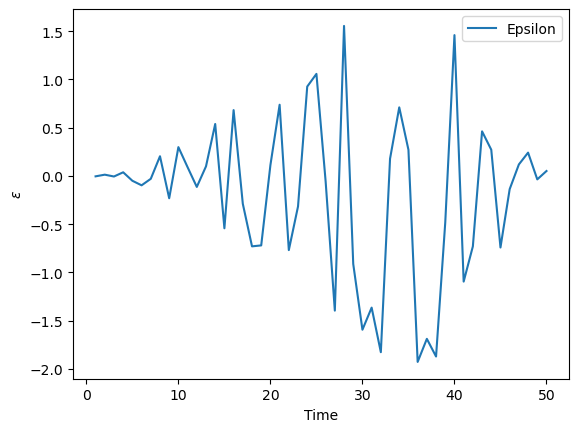

In [13]:
# graph the changes of the error for different values of m
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('general_simulation.png')
plt.show()
